## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = combined_data.groupby("Drug Regimen").agg(
    tumor_mean = ("Tumor Volume (mm3)",np.mean),
    tumor_median = ("Tumor Volume (mm3)",np.median),
    tumor_variance = ("Tumor Volume (mm3)",np.var),
    tumor_sd = ("Tumor Volume (mm3)",np.std),
    tumor_SEM = ("Tumor Volume (mm3)",st.sem)
    ).round(4)
summary_table

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tumor_mean,tumor_median,tumor_variance,tumor_sd,tumor_SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

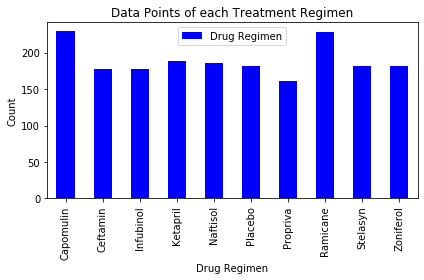

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# group by Drug Regimen
drug = combined_data.groupby('Drug Regimen')

# make a data frame to plot the data points
data_points = pd.DataFrame(drug['Drug Regimen'].count())

#create a bar plot
bar_plot=data_points.plot(kind='bar', title="Data Points of each Treatment Regimen", color="blue", align="center")
# assign x and y axis
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Count")
plt.tight_layout()
    
plt.show   


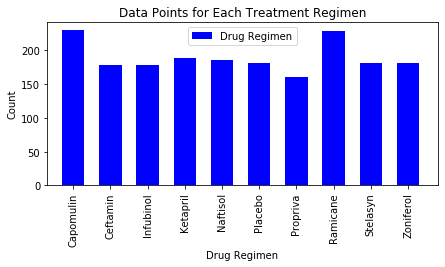

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points))
ticks = [value for value in x_axis]

# chart configuration by size, color and ticks
plt.figure(figsize=(7,3))
plt.bar(x_axis, data_points["Drug Regimen"], color="blue", align="center", width=0.6)
plt.xticks(ticks, list(data_points.index), rotation="vertical")

# set x and. y limit
plt.xlim(-0.7,len(x_axis)-0.2)
plt.ylim(0, max(data_points["Drug Regimen"]*1.05))

# x and y labels
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#put the legend at the best location
column_name = ["Drug Regimen"]
plt.legend(column_name, loc="best")

plt.show()




## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

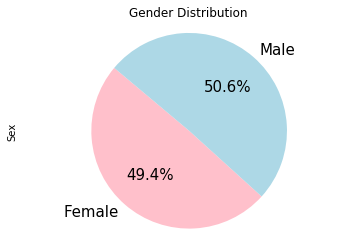

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# groupby gender
gender = combined_data.groupby('Sex')

# create a data frame 
gender = pd.DataFrame (gender['Sex'].count())

# make a pie plot for the gender data
gender.plot(kind='pie', y='Sex',
            title="Gender Distribution",startangle=140,
            autopct='%1.1f%%', shadow=False, fontsize=15, colors=["pink","lightblue"], legend=False)

# to make it round
plt.axis("equal")
plt.show

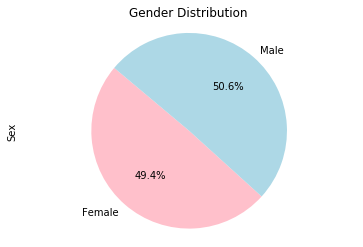

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = list(gender.index.values)
count_plot = gender["Sex"]
colors = ["pink", "lightblue"]
plt.pie(count_plot, labels=gender_plot, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=140)

plt.rcParams['font.size'] = 10
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# create a drug list
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# slice the data set
drug_list = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drug_list.head(50)

# groupby drug regimen to determine the effectiveness 
drug_effect = drug_list.groupby(["Drug Regimen", "Mouse ID"]).agg(
    tumor_vol=("Tumor Volume (mm3)",lambda x:x.iloc[-1])).round(4)
drug_effect

# find out quartile renges to identify the outliers
effect_unstack = drug_effect.stack(level=0).unstack(level=0)

effect_unstack.head()





,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_vol,NaN,NaN,67.9734,NaN
a251,tumor_vol,NaN,NaN,65.5257,NaN
a275,tumor_vol,NaN,62.9994,NaN,NaN
a411,tumor_vol,NaN,NaN,NaN,38.4076
a444,tumor_vol,NaN,NaN,NaN,43.0475


In [11]:
counter = 0

# do quartile calculations for each drug
for drug in drug_list:
    quartiles = effect_unstack[drug].quantile([.25,.5,.75]).round(2)
    lower_q = quartiles[0.25].round(2)
    upper_q = quartiles[0.75].round(2)
    inter_q = round(upper_q - lower_q,2)
    lower = round(lower_q-(1.5*inter_q),2)
    upper = round(upper_q-(1.5*inter_q),2)
    
    
# Print the summary
if counter == 0:
    print(f"--------------------------------------------------")
    print(f"Lower Quartile of {drug}is:{lower_q}")
    print(f"Upper Quartile of {drug}is:{upper_q}")
    print(f"Interquartile Range of {drug}is:{inter_q}")
    print(f"Median of {drug}is:{quartiles[0.5]}")
    print(f"{upper}and above are the possible outliers.")
    print(f"{lower}and below are possible outliers.")
    print(f"--------------------------------------------------")
    counter += 1
    



KeyError: 'Mouse ID'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# make a list
boxplot = []

for drug in drug_list:
    boxplot.append(list(effect_unstack[drug].dropna()))
    
    
    

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen